In [81]:
import pandas as pd
import numpy as np
import cv2
from skimage.morphology import skeletonize
from skimage.util import invert
import matplotlib.pyplot as plt
from skimage.morphology import disk, square, erosion, dilation, area_closing, remove_small_objects

In [9]:
# first data, read CSV + image
path = '../../Data/'
f_img = cv2.imread(path + 'ex03.jpg')
gray_f_img = cv2.cvtColor(f_img, cv2.COLOR_BGR2GRAY)
f_gt = pd.read_csv(path + 'ex03.csv', header=None)

In [10]:
f_gt

,0,1
0,381.0,1060.0
1,465.0,1374.0
2,546.0,1223.0
3,572.0,938.0
4,583.0,1098.0
5,646.0,1596.0
6,655.0,630.0
7,682.0,670.0
8,727.0,1504.0
9,752.0,1313.0


In [11]:
def plot_img(img, gt, title):
    xs = list(f_gt[0])
    ys = list(f_gt[1])
    plt.figure(figsize=(10,8))
    plt.title(title)
    plt.imshow(img, cmap='gray')
    for idx in range(len(xs)):
        j, i = ys[idx], xs[idx]
        plt.scatter(j, i, color='r')
    plt.show()

In [12]:
gray_f_img

array([[111, 112, 114, ..., 124, 123, 123],
       [112, 113, 114, ..., 124, 124, 124],
       [113, 113, 114, ..., 125, 125, 125],
       ...,
       [ 82,  83,  83, ..., 121, 121, 121],
       [ 81,  82,  82, ..., 122, 121, 121],
       [ 81,  82,  81, ..., 122, 121, 121]], dtype=uint8)

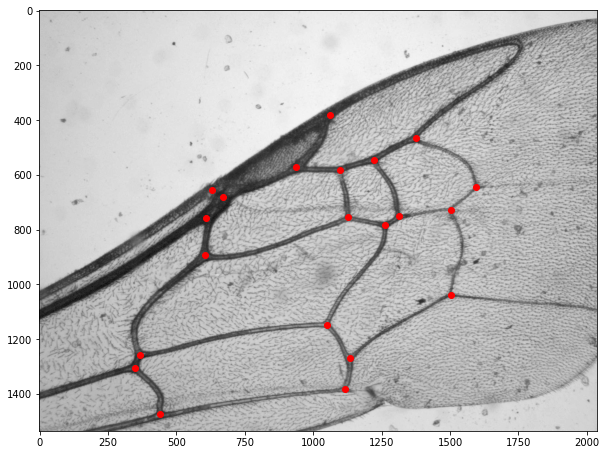

In [13]:
plot_img(gray_f_img, f_gt, title='')

In [104]:
# threshold image
threshold_val = 90
ret, img = cv2.threshold(gray_f_img, threshold_val, 255, 0)

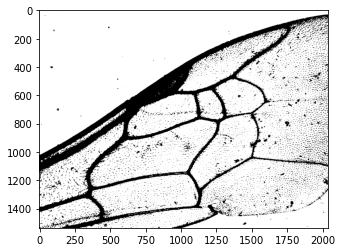

In [105]:
plt.imshow(img, cmap='gray')
plt.show()

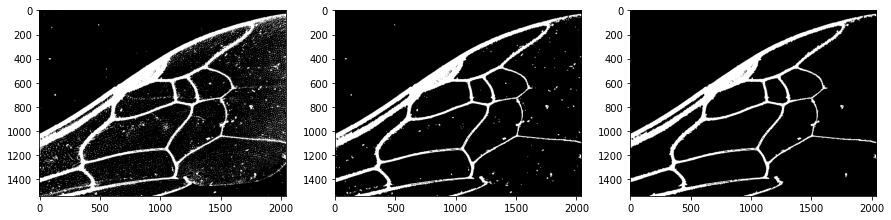

In [120]:
image = invert(img)
plt.figure(figsize=(15,12))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')

tmp = erosion(image, square(5))
tmp = erosion(tmp, square(2))
tmp = dilation(tmp, square(5))

plt.subplot(1, 3, 2)
plt.imshow(tmp, cmap='gray')
tmp = tmp > 0
tmp = remove_small_objects(tmp, min_size=300)

plt.subplot(1, 3, 3)
plt.imshow(tmp, cmap='gray')
plt.show()

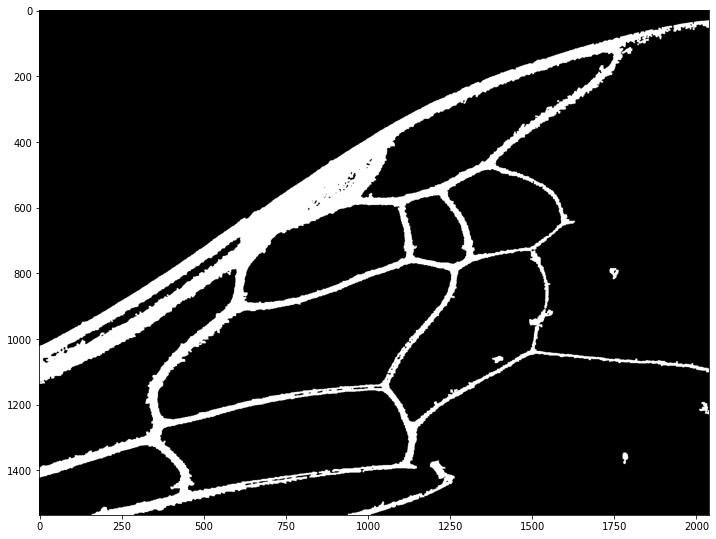

In [121]:
plt.figure(figsize=(12,10))
plt.imshow(tmp, cmap='gray')
plt.show()

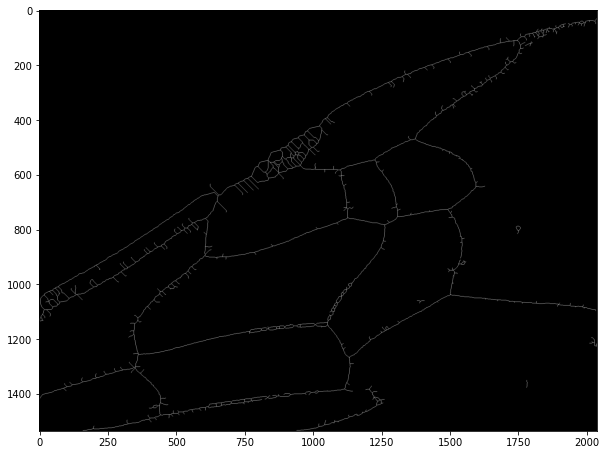

In [124]:
tmp = tmp.astype(np.float32)

# perform skeletonization
skeleton = skeletonize(tmp)
plt.figure(figsize=(10,8))
plt.imshow(skeleton, cmap='gray')
plt.show()

In [125]:
i, j = list(f_gt.iloc[10])
i, j = int(i), int(j)
i, j

(756, 1128)

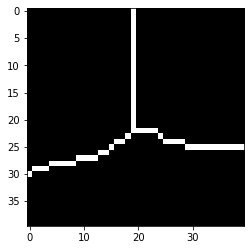

In [129]:
win_size=20
template_1 = skeleton[i-win_size:i+win_size, j-win_size:j+win_size]
plt.imshow(template_1, cmap='gray')

In [131]:
skeleton = skeleton.astype(np.float32)
skeleton

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [132]:
dst = cv2.cornerHarris(skeleton, blockSize=2, ksize=3, k=0.7)
dst

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

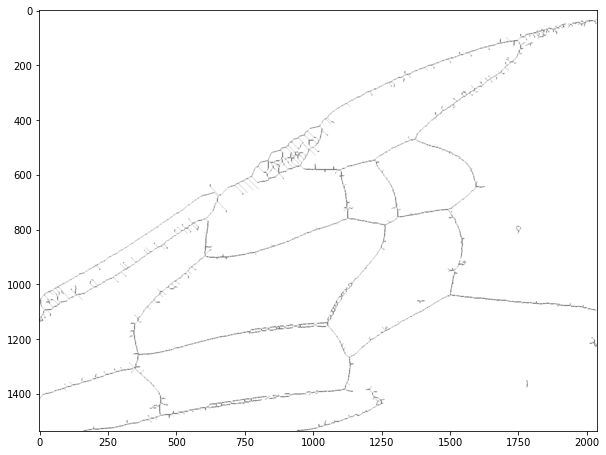

In [145]:
plt.figure(figsize=(10,8))
plt.imshow(dst, cmap='gray')
plt.show()

In [106]:
# try Harris corner detector
#gray_f_img = np.float32(gray_f_img)
gray_f_img.dtype, gray_f_img.shape

(dtype('float32'), (1536, 2048))

In [138]:
dst = cv2.cornerHarris(gray_f_img, blockSize=2, ksize=3, k=0.7)
dst

array([[-1.12879684e+02, -1.12879684e+02, -2.73757801e+01, ...,
        -2.17480451e-01, -5.17578097e-03,  0.00000000e+00],
       [-1.12879684e+02, -1.12879684e+02, -2.73757801e+01, ...,
        -2.17480451e-01, -5.17578097e-03,  0.00000000e+00],
       [-2.31207809e+02, -2.31207809e+02, -1.54988571e+02, ...,
        -2.47851551e-01, -1.75781245e-03,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.59914883e+04, -3.22508047e+04, -3.59540156e+04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -5.71268398e+04, -1.46771807e+04, -3.10260625e+04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.06891875e+04, -7.87063232e+02, -8.76800781e+02]], dtype=float32)

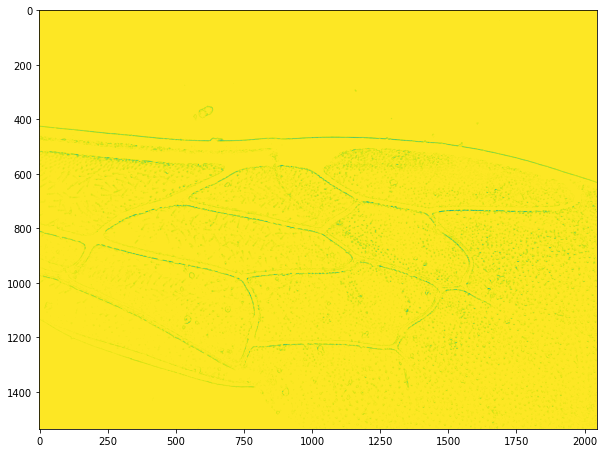

In [140]:
plt.figure(figsize=(10,8))
plt.imshow(dst)

In [141]:
# TODO
# 8-connectivity neighbors
# Skeletonization (cv2.ximgproc.thinning)

# links
# https://answers.opencv.org/question/228131/detection-of-blood-vessels-junctions/
# https://docs.opencv.org/3.4/d1/dc5/tutorial_background_subtraction.html
# https://answers.opencv.org/question/228567/checking-for-numbers-of-blood-vessels-junctions-detected/
# https://github.com/kasturijoshi06/Blood-vessel-extraction-and-microaneurysm-detection-in-retinal-images/blob/master/bloodvesselextraction.py